# Daniel lupercio - STAT 724 HW 1

In [2]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

## Chapter 3, Exercise 10

In [3]:
import os
UP_DIR = '/Users/daniel421/Desktop/STAT_724/ISLR_data'
csv_file = os.path.join(UP_DIR,'Carseats.csv')
car_seats = pd.read_csv(csv_file)
car_seats.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### (a) Fit a multiple regression model to predict ${Sales}$ using $Price$, $Urban$, and $US$.

In [4]:
model_fit = smf.ols("Sales ~ Price + Urban + US", car_seats).fit()

### (b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

In [5]:
model_fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,13.0435,0.651,20.036,0.000,11.764,14.323
Urban[T.Yes],-0.0219,0.272,-0.081,0.936,-0.556,0.512
US[T.Yes],1.2006,0.259,4.635,0.000,0.691,1.710
Price,-0.0545,0.005,-10.389,0.000,-0.065,-0.044


For fixed values of $Urban$ and $US$, a 1-unit increase in $\textbf{Price}$ results in a change of $Sales$ of -0.0545 units (54 sales).

For fixed values of $Price$ and $Urban$, the effect of the store being located in the $\textbf{US}$ is a change of $Sales$ of 1.2006 units (1,200 sales). 

For fixed values of $Price$ and $US$, the effect of the store being located in an $\textbf{Urban}$ location is a change of $Sales$ of -.0219 units (decrease of 22 sales).

### (c) Write out the model in equation form, being careful to handle the qualitative variables properly.

$$
\hat{y} = 13.0435 - 0.0219*Urban + 1.2006*US - 0.0545*Price
$$

- $Urban$ = 1 for a store in an urban location, 0 elsewhere
- $US$ = 1 for a store in the US, 0 elsewhere

### (d) For which of the predictors can you reject the null hypothesis $H_0 : \beta_j = 0$?


<h1><center>$H_0: \beta_{2,3} = 0$ & $H_A: \beta_{2,3} \neq 0$</center></h1>


Based on the p-values of $US$ and $Price$, we can reject $H_0: \beta_{2,3} = 0$

### (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [6]:
model_fit2 = smf.ols("Sales ~ Price + US", car_seats).fit()

In [7]:
model_fit2.summary().tables[0]

Dep. Variable:,Sales,R-squared:,0.239
Model:,OLS,Adj. R-squared:,0.235
Method:,Least Squares,F-statistic:,62.43
Date:,"Sat, 25 Sep 2021",Prob (F-statistic):,2.66e-24
Time:,13:54:09,Log-Likelihood:,-927.66
No. Observations:,400,AIC:,1861.
Df Residuals:,397,BIC:,1873.
Df Model:,2,,
Covariance Type:,nonrobust,,


### (f) How well do the models in (a) and (e) fit the data?

$R^2 = 0.239$ and $\bar{R^2} = 0.234$ for the (a) model <br>
$R^2 = 0.239$ and $\bar{R^2} = 0.235$ for the (e) model

Both models can explain approximately 23.9% of the variance in $Sales$. However, the $\bar{R^2}$ for model (e) has a slight increase. This can be attributed in part, to the removal of the $Urban$ variable. Although we have very limiting information, it would be best to use the model in (e).

### (g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

In [8]:
model_fit2.conf_int(alpha=0.05, cols=None)

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


We can say that there is a 95% probability that, on average, the true parameter for $Price$ ($\beta_2$) falls within (-0.0648, -0.0442). <br>
We can say that there is a 95% probability that, on average, the true parameter for $US$ ($\beta_1$) falls within (0.692, 1.708).

### (h) Is there evidence of outliers or high leverage observations in the model from (e)?

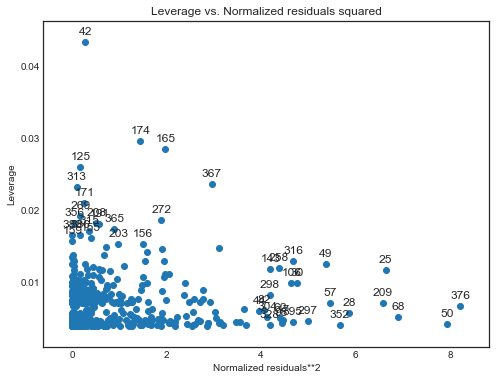

In [9]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2

fig, ax = plt.subplots(figsize=(8, 6))
fig = plot_leverage_resid2(model_fit2, ax=ax)

In [10]:
from statsmodels.stats.outliers_influence import OLSInfluence as influence
# Compute the influence to get Cook's distance
inf = influence(model_fit2)

# cooks_distance is an attribute of incluence, here C, not sure about P (p-value maybe?)
C, P = inf.cooks_distance

<AxesSubplot:title={'center':"Cook's Distance Outlier Detection"}, xlabel='instance', ylabel='distance'>

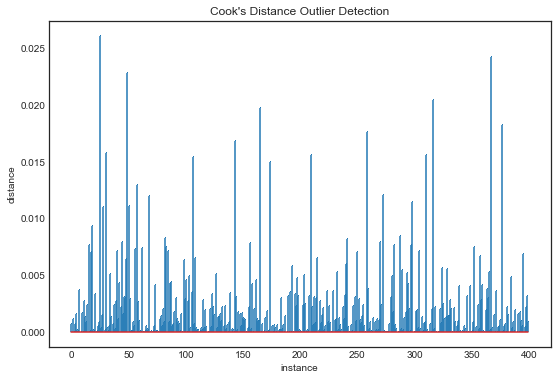

In [11]:
def plot_cooks_distance(c):
    _, ax = plt.subplots(figsize=(9,6))
    ax.stem(c, markerfmt=",")
    ax.set_xlabel("instance")
    ax.set_ylabel("distance")
    ax.set_title("Cook's Distance Outlier Detection")
    return ax


plot_cooks_distance(C)

There are instances of high leverage obserations, however, there is no indication of strong outliers. This is based off of low cook's distances.